In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
%matplotlib inline

In [13]:
# The 2D Gaussian distribution function
def gaussian2D(xy, x0, y0, sigma_x, sigma_y, A=1, theta=0):
    """ Gaussian in 2D with maximum at (x0, y0) of amplitude A and std deviation (sigma_x, sigma_y) rotated around an angle theta
    : (x,y): position the function is evaluated at
      (x0, y0): center of gaussian
      (sigma_x, sigma_y): std deviation along both axes
      A: amplitude, if -1 then normalized to 1 (-1 by default)
      theta: angle of rotation (radian) (0 by default)
    return: scalar
    """
    (x, y) = np.asarray(xy).reshape(2, int(np.shape(xy)[0]/2))
    a = np.cos(theta)**2/(2*sigma_x**2) + np.sin(theta)**2/(2*sigma_y**2)
    b = -np.sin(2*theta)/(4*sigma_x**2) + np.sin(2*theta)**2/(4*sigma_y**2)
    c = np.sin(theta)**2/(2*sigma_x**2) + np.cos(theta)**2/(2*sigma_y**2)
    r = np.exp(-(a*(x-x0)**2 + 2*b*(x-x0)*(y-y0) + c*(y-y0)**2))
    if np.sum(r) != 0:
      return A*r/np.sum(r)
    else:
      return np.inf

5.0893777118123085


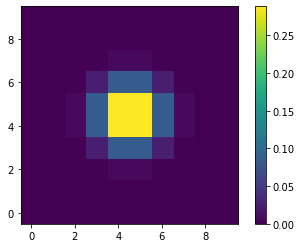

In [5]:
# Representing a 2D Gaussian distribution
xs = np.linspace(-5, 5, 10)
ys = np.linspace(-5, 5, 10)
xy = np.meshgrid(xs, ys)
xy = np.ravel(xy)

G = gaussian2D(xy, 0, 0, 1, 1, A=2)

plt.figure()
plt.imshow(G.reshape(int(np.sqrt(np.shape(G)[0])), int(
    np.sqrt(np.shape(G)[0]))), origin='lower', cmap='viridis', interpolation='none')
plt.colorbar()

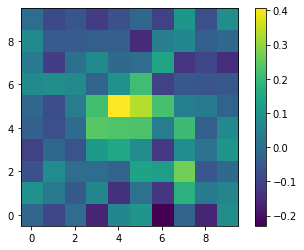

In [6]:
# Create some noisy data
data = G + 0.33*np.max(G)*np.random.normal(size=G.shape)

plt.figure()
plt.imshow(data.reshape(int(np.sqrt(np.shape(data)[0])), int(
    np.sqrt(np.shape(data)[0]))), origin='lower', cmap='viridis', interpolation='none')
plt.colorbar()

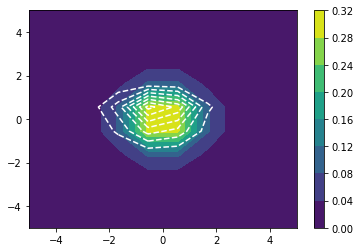

In [20]:
# Fitting of the model on the noisy data
initial_guess = (0, 0, 0.5, 0.5)
popt, pcov = opt.curve_fit(gaussian2D, xy, data, p0=initial_guess, bounds=([-5, -5, 0, 0], [5, 5, 5, 5]))
interpolated_data = gaussian2D(xy, popt[0], popt[1],
                               popt[2], popt[3], A=-1)
data_bis = G.reshape(int(np.sqrt(np.shape(data)[0])), int(
    np.sqrt(np.shape(data)[0])))

plt.figure()
plt.contourf(xs, ys, data_bis, origin='lower', cmap='viridis')
plt.colorbar()
plt.contour(xs, ys, interpolated_data.reshape(10, 10), 8, colors='w')
